In [1]:
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import numpy
import iris.coord_categorisation

In [2]:
%matplotlib inline

In [3]:
infile = '/g/data/ua6/DRSv2/CMIP5/CSIRO-Mk3-6-0/historical/mon/ocean/r1i1p1/tauuo/latest/tauuo_Omon_CSIRO-Mk3-6-0_historical_r1i1p1_185001-200512.nc'

In [4]:
cube = iris.load_cube(infile, 'surface_downward_x_stress')

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [5]:
print(cube)

surface_downward_x_stress / (N m-2) (time: 1872; latitude: 189; longitude: 192)
     Dimension coordinates:
          time                           x               -               -
          latitude                       -               x               -
          longitude                      -               -               x
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          branch_time: 29200.0
          cmor_version: 2.6.0
          comment: Data is stored on the native atmosphere grid on which the data was generated....
          contact: Project leaders: Stephen Jeffrey (Stephen.Jeffrey@qld.gov.au) & Leon Rotstayn...
          creation_date: 2011-07-27T01:54:07Z
          experiment: historical
          experiment_id: historical
          forcing: Ant,Nat (all forcings)
          frequency: mon
          history: 2011-07-27T01:54:07Z altered by CMOR: replaced missing v

In [6]:
clim = cube.collapsed('time', iris.analysis.MEAN)

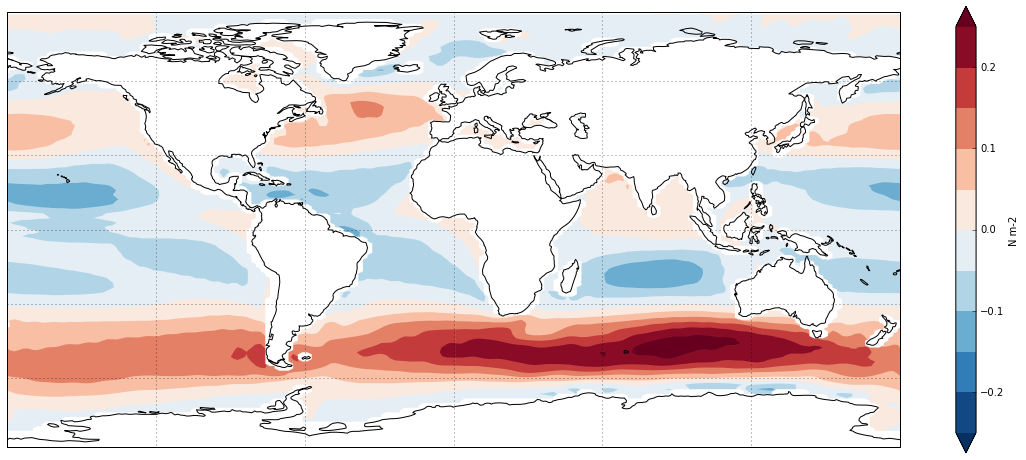

In [15]:
fig = plt.figure(figsize=[20,8])
iplt.contourf(clim, cmap='RdBu_r',
              levels=[-0.25, -0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25],
              extend='both')
plt.gca().coastlines()
plt.gca().gridlines()
cbar = plt.colorbar()
cbar.set_label(str(clim.units))
plt.show()

In [9]:
print(clim.data.min())
print(clim.data.max())

-0.150235
0.293961
